In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import itertools
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report   
from sklearn.linear_model import LogisticRegression
from sklearn import svm


#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Datafiniti_Hotel_Reviews.csv")
#Filter out ratings that are zero
data = data[data['reviews.rating']>0]
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [3]:
#Testing NLP - Sentiment Analysis using TextBlob
print(TextBlob("The hotel is good").sentiment)
print(TextBlob("The hotel is very good").sentiment)
print(TextBlob("The hotel is good overall, except the toilet is dirty and floors are wet").sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)
Sentiment(polarity=-0.0066666666666666706, subjectivity=0.36000000000000004)


In [0]:
#Calculating the Sentiment Polarity
polarity = [] # list which will contain the polarity of the comments
subjectivity = [] # list which will contain the subjectivity of the comments
for i in data['reviews.text'].values:
    try:
        analysis = TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)       
    except:
        polarity.append(0)
        subjectivity.append(0)

In [0]:
#Adding the Sentiment Polarity column to the data
data['polarity'] = polarity
data['subjectivity'] = subjectivity

In [6]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,polarity,subjectivity
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.589286,0.642857
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.375000,0.531250
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.488889,0.538889
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,-0.125000,0.325000
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,0.320501,0.531633


In [7]:
#Displaying the POSITIVE comments
data[['name','reviews.text','polarity','subjectivity']][data.polarity>0].head(10)

,name,reviews.text,polarity,subjectivity
0,Rancho Valencia Resort Spa,Our experience at Rancho Valencia was absolute...,0.589286,0.642857
1,Rancho Valencia Resort Spa,Amazing place. Everyone was extremely warm and...,0.375000,0.531250
2,Rancho Valencia Resort Spa,We booked a 3 night stay at Rancho Valencia to...,0.488889,0.538889
4,Aloft Arundel Mills,I live in Md and the Aloft is my Home away fro...,0.320501,0.531633
5,Aloft Arundel Mills,I stayed here with my family for my daughters ...,0.312000,0.628000
6,Aloft Arundel Mills,Beautiful rooms and the nicest people working ...,0.336111,0.644444
7,Aloft Arundel Mills,We stayed here while visiting Maryland Live!. ...,0.378807,0.688333
8,Aloft Arundel Mills,"I travel a lot with my job, so I'm constantly ...",0.057143,0.371429
9,Hampton Inn Suites PortlandVancouver,"In my line of work, I use meeting space in hot...",0.375000,0.416667
10,Hampton Inn Suites PortlandVancouver,The staff is very friendly and helpful. The ro...,0.449012,0.584704


In [8]:
#Displaying the NEGATIVE comments
data[['name','reviews.text','polarity','subjectivity']][data.polarity<0].head(10)

,name,reviews.text,polarity,subjectivity
3,Aloft Arundel Mills,Currently in bed writing this for the past hr ...,-0.125000,0.325000
30,Hampton Inn Suites National HarborAlexandria Area,"heat in room did not work properly, tv remote ...",-0.250000,0.533333
31,Hampton Inn Suites National HarborAlexandria Area,"Even though we were having problems, i.e. Feat...",-0.012500,0.562500
45,Hampton Inn Suites National HarborAlexandria Area,I was really disappointed with the TV service....,-0.470000,0.493333
69,Fairmont Grand Del Mar,Expensive Yes. Service Above the norm! Nickel ...,-0.078125,0.425000
77,Best Western at OHare,Average hotel for decent price. It was balance...,-0.045833,0.529167
78,Best Western at OHare,The room key did not work i to go to lobby 4 t...,-0.163750,0.494167
85,Virgin Hotels Chicago,Bad: The room rate was terrible we had a Booki...,-0.260000,0.493333
94,Virgin Hotels Chicago,Bad: Intermittent barking dog!. Good: Spacious...,-0.005000,0.602222
101,The Boxer,Bad: I was supposed to get a room with two bed...,-0.252083,0.578889


In [9]:
#Displaying the NEUTRAL comments
data[['name','reviews.text','polarity','subjectivity']][data.polarity==0].head(10)

,name,reviews.text,polarity,subjectivity
112,The Boxer,The location,0.0,0.0
653,W Boston,Dated... The room,0.0,0.0
691,W Boston,Big room,0.0,0.1
1300,Holiday Inn North Phoenix,This hotel has bedbugs!! The staff acted like ...,0.0,0.1
1305,Holiday Inn North Phoenix,I like it,0.0,0.0
1569,Best Western Courtesy Inn,Stayed there to be close to downtown disney,0.0,0.0
1588,Pacific Inn,We had difficulty finding this motel. It is cl...,0.0,0.0
1996,Clarion Inn & Suites,Met our expectations.,0.0,0.0
2551,Hampton Inn-athens,although the initial nonsmoking room selected ...,0.0,0.2
2689,Baymont Inn & Suites Bowling Green,"Room smelled musty, carpets and bedding had a ...",0.0,0.0


In [10]:
#Displaying highly subjective reviews
data[['name','reviews.text','polarity','subjectivity']][data.subjectivity>0.8].head(10)

,name,reviews.text,polarity,subjectivity
20,The Inn at Solvang,Everything was sold out in State College for G...,0.859375,0.875000
35,Hampton Inn Suites National HarborAlexandria Area,Free breakfast! Attentive staff Fantastic loca...,0.433333,0.866667
42,Hampton Inn Suites National HarborAlexandria Area,I loved my stay VIP service all the way. I did...,0.650000,0.850000
51,Hampton Inn Suites National HarborAlexandria Area,I can't comment on the breakfast because we sl...,1.000000,1.000000
55,Hampton Inn Suites National HarborAlexandria Area,I stayed here with some friends for a conventi...,0.566667,0.800000
59,Fairmont Grand Del Mar,We hosted our annual Client Event at The Grand...,0.716667,0.875000
67,Fairmont Grand Del Mar,The resort and staff are wonderful. The hotel ...,0.683143,0.807143
105,The Boxer,Good: Beautiful rooms and amenities - L'occita...,0.730000,0.810000
129,The Boxer,the bed was very comfortable,0.520000,1.000000
143,The Boxer,The bed was uncomfortable It was close walking...,-0.500000,1.000000


In [11]:
data['reviews.length'] = data["reviews.text"].str.len()
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,polarity,subjectivity,reviews.length
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.589286,0.642857,169.0
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.375000,0.531250,283.0
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,0.488889,0.538889,471.0
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,-0.125000,0.325000,198.0
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,0.320501,0.531633,307.0


In [0]:
# remove NA values
df_clean = data.round({"reviews.rating":0})
df1 = df_clean[['polarity','reviews.rating']]
df2 = df_clean[['polarity','subjectivity','reviews.rating','latitude','longitude','reviews.length']]
df1 = df1.dropna()
df2 = df2.dropna()

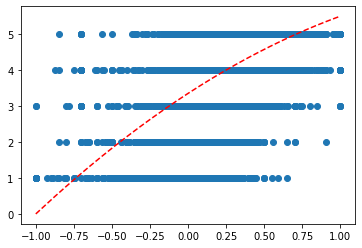

In [13]:

df1.sort_values(by=['polarity'], inplace=True)
plt.scatter(df1['polarity'], df1['reviews.rating'])
fit = np.polyfit(df1['polarity'], df1['reviews.rating'], deg=2)
p = np.poly1d(fit)
plt.plot(df1['polarity'],p(df1['polarity']),"r--")
plt.show()

In [0]:
# 1. Using Polarity as the only independent variable to build model 
# 70% training and 30% testing data

train_x, test_x, train_y, test_y = train_test_split(df1['polarity'], df1['reviews.rating'], test_size=0.3, random_state=1)

In [15]:
train_array = train_x.to_numpy() 
train_array = train_array.reshape(-1,1)
train_array[:10]

array([[0.12675439],
       [0.34166667],
       [0.10297619],
       [0.11851852],
       [0.34333333],
       [0.075     ],
       [0.40416667],
       [0.22916667],
       [0.309375  ],
       [0.12      ]])

In [0]:
# Change y to category 
train_y = train_y.astype(str)

In [0]:
# 1.1 Logistic Regression Model

lr = LogisticRegression()
model_lr = lr.fit(train_array,train_y)

In [18]:
model_lr.score(train_array,train_y)

0.4928571428571429

In [0]:
test_array = test_x.to_numpy() 
test_array = test_array.reshape(-1,1)
test_array[:10]
test_y = test_y.astype(str)

In [0]:
predict_lr = model_lr.predict(test_array)

In [21]:
accuracy_score(test_y, predict_lr)

0.5106666666666667

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  46    0   25   41   42]
 [  35    0   28   63   63]
 [  28    0   43   90  223]
 [  22    0   18   92  680]
 [   9    0   11   90 1351]]


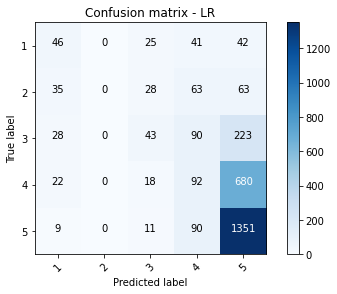

In [23]:
# Confusion Matrix of Linear Regression

c1 = confusion_matrix(test_y, predict_lr) 
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c1, classes=class_names,normalize=False,title='Confusion matrix - LR')

In [24]:
# 1.2 Support Vector Machine

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_array, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
clf_svm.score(train_array, train_y)

0.47928571428571426

In [0]:
predict_svm = clf_svm.predict(test_array)

In [27]:
test_y = test_y.astype(str)
accuracy_score(test_y, predict_svm)

0.5006666666666667

Confusion matrix, without normalization
[[  44    0    0   14   96]
 [  30    0    0   13  146]
 [  27    0    0   13  344]
 [  20    0    0   10  782]
 [   8    0    0    5 1448]]


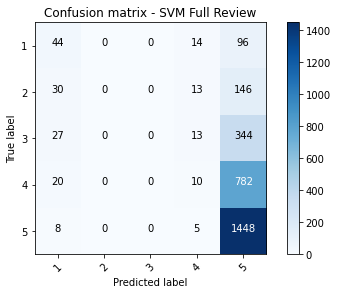

In [28]:
# Confusion Matrix of SVM

c2 = confusion_matrix(test_y, predict_svm) 
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c2, classes=class_names,normalize=False,title='Confusion matrix - SVM Full Review')


In [0]:
# 2. Add more variables to prediction model  
# review length, subjectivity, location
# 70% training and 30% testing data
x_features = ['polarity','subjectivity','reviews.length','latitude','longitude']

# Extract features
X = df2.loc[:, x_features].values

train_x2, test_x2, train_y2, test_y2 = train_test_split(X, df2['reviews.rating'], test_size=0.3, random_state=1)

In [0]:
# 2.1 Linear Regression

#change y to category
train_y2 = train_y2.astype(str)
test_y2 = test_y2.astype(str)


lr2 = LogisticRegression()
model_lr2 = lr2.fit(train_x2,train_y2)

In [31]:
model_lr2.score(train_x2,train_y2)

0.47335333619088443

In [0]:
predict_lr2 = model_lr2.predict(test_x2)

In [33]:
accuracy_score(test_y2, predict_lr2)

0.462

Confusion matrix, without normalization
[[   1    0    0    0  175]
 [   0    0    0    0  190]
 [   3    0    0    0  404]
 [   2    0    1    0  836]
 [   2    0    1    0 1385]]


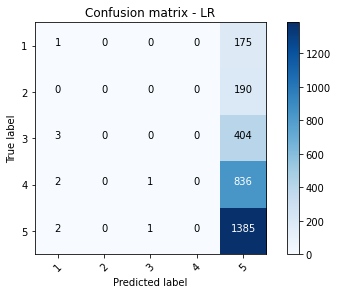

In [34]:
# Confusion Matrix of Linear Regression

c3 = confusion_matrix(test_y2, predict_lr2) 
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c3, classes=class_names,normalize=False,title='Confusion matrix - LR')

In [35]:
# 2.1 Support Vector Machine

clf_svm2 = svm.SVC(kernel='linear')
clf_svm2.fit(train_x2, train_y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf_svm2.score(train_x2, train_y2)

0.4970710101443063

In [0]:
predict_svm2 = clf_svm2.predict(test_x2)

In [0]:
accuracy_score(test_y2, predict_svm2)

0.4826666666666667

Confusion matrix, without normalization
[[  59    0   15   15   87]
 [  32    0   15   14  129]
 [  24    0   14   15  354]
 [  11    0   11   11  806]
 [  11    0   10    3 1364]]


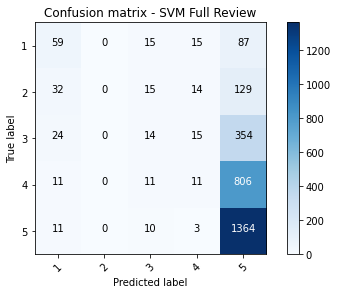

In [0]:
# Confusion Matrix
c3 = confusion_matrix(test_y2, predict_svm2) 
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c3, classes=class_names,normalize=False,title='Confusion matrix - SVM (more variables)')

